In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as scs
%matplotlib inline
plt.style.use('ggplot')
sns.set(style="whitegrid", palette="pastel", color_codes=True)

In [2]:
import sys

In [3]:
print(sys.stdout.encoding)

UTF-8


### Buisness Understanding 10	
>* Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

* The dataset we used is a list of Kaggle reports compiled in Feburary 2018 . It contains a total of 378661 individual observations, and reports if each of those individual project were successful or failed.  The benefit of understanding this dataset is that it would put you, as the investor, in a stronger position to decide which Kickstarters are more likley to be successful, and which are likley to fail

* If we were using a prediciton algorithim, we could maintain a randomly selected holout set to valuidate our model.  Alternativly, we could use a cross validated set.

### Data Meaning Type 	10	
> * Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

https://www.kaggle.com/kemical/kickstarter-projects

In [4]:
data = pd.read_csv('data/ks-projects-201801.csv')

In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [268]:
data.sample(3).T

283608  \
ID                          512975521   
name                     Mary's Place   
category                  Restaurants   
main_category                    Food   
currency                          USD   
deadline                   2016-07-02   
goal                            20000   
launched          2016-05-03 06:26:00   
pledged                             0   
state                          failed   
backers                             0   
country                            US   
usd pledged                         0   
usd_pledged_real                    0   
usd_goal_real                   20000   

                                                     256784  \
ID                                                375783793   
name              The District Theatre's 2012 Summer Season   
category                                            Theater   
main_category                                       Theater   
currency                                                USD   
deadline                                         2012-06-02   
goal                                                   5000   
launched                                2012-05-03 23:39:32   
pledged                                                5335   
state                                            successful   
backers                                                  77   
country                                                  US   
usd pledged                                            5335   
usd_pledged_real                                       5335   
usd_goal_real                                          5000   

                                                   165503  
ID                                             1842099854  
name              Fernando the Fabulous - 16mm short film  
category                                           Shorts  
main_category                                Film & Video  
currency                                              USD  
deadline                                       2014-02-17  
goal                                                 1250  
launched                              2014-01-14 01:47:09  
pledged                                              1410  
state                                          successful  
backers                                                18  
country                                                US  
usd pledged                                          1410  
usd_pledged_real                                     1410  
usd_goal_real                                        1250

In [269]:
data['state'].value_counts(1)

failed        0.522153
successful    0.353762
canceled      0.102411
undefined     0.009407
live          0.007392
suspended     0.004875
Name: state, dtype: float64

* The dataset consists of 378661 observations.  These observations are all individual kickstarters which occured over the past few years.  The included features in this dataset are as follows:
>* ID: int 
>>- a unique identifer for each kickstarter project
>* Backers: int 
>>- number of people who backed the kickstarter program
>* Category: str
>>- product catagory which the Kickstarter falls into (set of 159)
>* Country: str
>>- Country of origin for the Kickstarter campaign
>* Currency: str
>>- Type of money used in goal and pledged
>* dataset: int {2018 | 2016}
>>- which dataset the kickstarter came from (either 2018 or 2016)
>* goal: float
>>- amount of money the kickstarter was looking for (in native currency)
>* launched: timestamp:
>>- time when the kickstarter was launched
>* main_category (int)
>>- Set of 15 diffirent larger catagories (similar to catagory)
>* Name: str
>>- Name of the kickstarter project
>* Pledged: float
>>- Value pledged to Kickstarter in native currency
>* State: str {failed, successful, canceled, live, undefined, suspended}
>>- Condition of Kickstarter at time of survey
>* USD Pledged: float
>>- value pledged in USD
>* USD_pledged_real: float
>>- This is an attempt to measure the atcaul USD based on currency values for the amount pledged at the time by the creator of the dataset
>* USD_goal_real: float
>>- This is an attempt to measure the atcaul USD based on currency values at the time for the kickstarter goal by the creator of the dataset

### Data Quality	15	
> * Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

In [5]:
with open('data/ks-projects-201612.csv', encoding='latin1') as fh:
        txt = fh.read()

body = []
headers = txt.split('\n')[0].strip().split(',')
for line in txt.split('\n')[1:]:
    body.append(line.split(','))

headers = [i for i in headers if len(i) > 3]

In [6]:
ukn = len(headers) + 1
while len(headers) < 25:
    headers.append('Unnamed: {}'.format(ukn))
    ukn += 1

data_16 = pd.DataFrame(body)
data_16.columns = headers
data_16.columns = [col.lower().strip() for col in data_16.columns]


data_18 = pd.read_csv('data/ks-projects-201801.csv')
data_18.columns = [col.lower().strip() for col in data_18.columns]

In [7]:
data_16.columns

Index(['name', 'category', 'main_category', 'currency', 'deadline', 'goal',
       'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged',
       'unnamed: 13', 'unnamed: 14', 'unnamed: 15', 'unnamed: 16',
       'unnamed: 17', 'unnamed: 18', 'unnamed: 19', 'unnamed: 20',
       'unnamed: 21', 'unnamed: 22', 'unnamed: 23', 'unnamed: 24',
       'unnamed: 25'],
      dtype='object')

In [8]:
data_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
id                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


#### There are several datapoints which are missing a significent amount of data in this dataset

The Unnamed columns (13-16) are artifact data due to commas in the pledged amount or Name field,  This could have been solved by using a .tsv or some other means of deliminating the data

* Evidence of this is shown below, where 6 values are taken from "unnamed: 14" (where it is not null) and each of those values contains 2 commas in the name field.

In [ ]:
iiter = data_16[data_16['unnamed: 14'].apply(lambda x: type(x) is str)]\
            .sample(6)[['name', 'category', 'main_category']].values
for x in iiter:
    print(','.join(i for i in x))

Additionally, the Creator of the dataset attempted to time adjust the values for USD pledged in the 2018 dataset, but this was not completed for the 2016 dataset.
* because of this, and the complexity associated with fixing datapoints which contain columns in them, we will be sticking to the 2018 dataset for the remainder of this analysis

In [ ]:
ids_2016 = data_16.index

In [272]:
"{:.1f}%".format(float(data_18.set_index('id').loc[ids_2016].shape[0])\
                                / data_16.shape[0] * 100)

'100.0%'

* This generalization appears to be valid, because the 2018 dataset contains all of the values from the 2016 dataset as well

There are 4 datapoints which are missing names.  Since this is only 4 datapoints out of 378661, we will assign these datapoint a randomly generated number as a name

In [273]:
data_18[~data_18['name'].apply(lambda x: type(x) is str)].iloc[:,:7]

id name        category main_category currency    deadline  \
166851  1848699072  NaN  Narrative Film  Film & Video      USD  2012-02-29   
307234   634871725  NaN     Video Games         Games      GBP  2013-01-06   
309991   648853978  NaN  Product Design        Design      USD  2016-07-18   
338931   796533179  NaN        Painting           Art      USD  2011-12-05   

            goal  
166851  200000.0  
307234    2000.0  
309991    2500.0  
338931   35000.0

In [274]:
rand_vars = np.random.randint(30000, 500000, size=4)
print(rand_vars)

[ 95767 356316  39370 124638]


In [275]:
noname = data_18[~data_18['name'].apply(lambda x: type(x) is str)].index

data_18.loc[noname , 'name'] = \
    pd.Series(np.random.choice(rand_vars, 4, replace=False)).astype(str)

additionaly, the 2018 dataset has 3797 values where the usd pledged value is null.  For our purposes, we will drop this column and use the usd_pledged_real column to identify if our project has met it's goal

For the sake of keeping everything uniform, we will keep all monetary values in USD for the remainder of this report, so they can be directly compared

In [276]:
data_18[np.isnan(data_18['usd pledged'])].shape

(3797, 15)

In [277]:
excl = {'usd pledged', 'goal', 'pledged'}
df = data_18[[col for col in data_18.columns if col not in excl]]

### * Simple Statistics	10	
> * Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful. 

* Removing redundant and null values has left us with only 3 continous features in the dataset.  ID is also included below, but this value is 

In [278]:
df.describe()

id        backers  usd_pledged_real  usd_goal_real
count  3.786610e+05  378661.000000      3.786610e+05   3.786610e+05
mean   1.074731e+09     105.617476      9.058924e+03   4.545440e+04
std    6.190862e+08     907.185035      9.097334e+04   1.152950e+06
min    5.971000e+03       0.000000      0.000000e+00   1.000000e-02
25%    5.382635e+08       2.000000      3.100000e+01   2.000000e+03
50%    1.075276e+09      12.000000      6.243300e+02   5.500000e+03
75%    1.610149e+09      56.000000      4.050000e+03   1.550000e+04
max    2.147476e+09  219382.000000      2.033899e+07   1.663614e+08

Based on our summary statistics, it looks like half of all Kickstarters have no more then 2 backers, make less then 31 dollars, and have a goal of 2,000 dollars or less; However, some Kickstarters have goals of over 10 million dollars, over 200,000 backers, and generate at 2 million dollars or more.  There is clearly a lot of range in this dataset.

#### Backers
first we will look at how backers are distributed

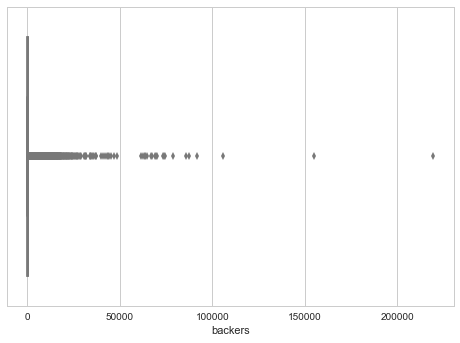

In [279]:
sns.boxplot(df['backers']);

* this pretty much just tells us that we have a lot of kickstarters with 0 backers, and most of them have less then 5,00 backers; so this seems like a strong cantidate for a log transformation

* Let's look at a violen plot of the log distribution so we can get a better view of what's going on

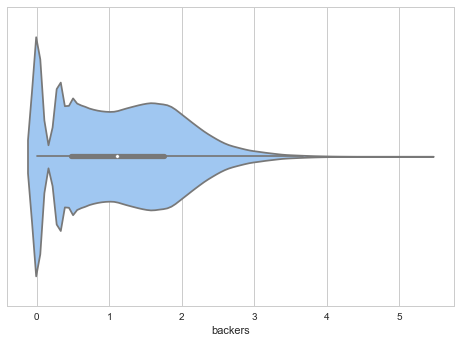

In [280]:
sns.violinplot(np.log10(df['backers'] + 1));

* without using a log distribution of backers, is it clear that a small percent of the Kickstarter campaigns get a large portion of the data.  It is fair to say this feature is non-baysiasn, and it appears to more closley follow a power law distribution.

* further evidence of this can be found in that nearly 50% of all Backers contributed to the top 1% of all kickstarter campaigns (as shown below)

In [281]:
bkrs = df['backers']
_50 = float(bkrs[bkrs >= bkrs.quantile(.50)].sum()) / bkrs.sum() * 100
_75 = float(bkrs[bkrs >= bkrs.quantile(.75)].sum()) / bkrs.sum() * 100
_90 = float(bkrs[bkrs >= bkrs.quantile(.90)].sum()) / bkrs.sum() * 100
_99 = float(bkrs[bkrs >= bkrs.quantile(.99)].sum()) / bkrs.sum() * 100
_999 = float(bkrs[bkrs >= bkrs.quantile(.999)].sum()) / bkrs.sum() * 100

tmplt = '{:.2f}% of the total number of backers go to the top {}% of kickstarters'

print(tmplt.format(_50, '50'))
print(tmplt.format(_75, '25'))
print(tmplt.format(_90, '10'))
print(tmplt.format(_99, '1'))
print(tmplt.format(_999, '0.1'))

98.69% of the total number of backers go to the top 50% of kickstarters
91.84% of the total number of backers go to the top 25% of kickstarters
78.22% of the total number of backers go to the top 10% of kickstarters
42.35% of the total number of backers go to the top 1% of kickstarters
17.22% of the total number of backers go to the top 0.1% of kickstarters


#### usd_pledged_real

* looking at the amount of money pledged, it shows a similar relationship to the number of backers; except it does have significent representation in the 400 USD to 800 USD range

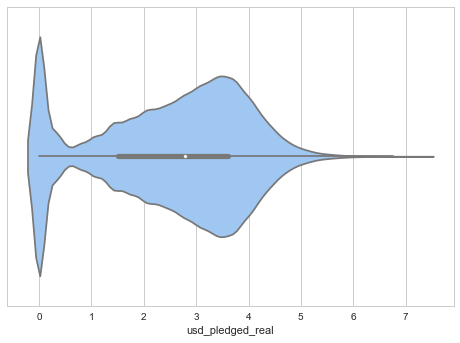

In [282]:
sns.violinplot(np.log10(df['usd_pledged_real'] + 1));

In [283]:
bkrs = df['usd_pledged_real']
_50 = float(bkrs[bkrs >= bkrs.quantile(.50)].sum()) / bkrs.sum() * 100
_75 = float(bkrs[bkrs >= bkrs.quantile(.75)].sum()) / bkrs.sum() * 100
_90 = float(bkrs[bkrs >= bkrs.quantile(.90)].sum()) / bkrs.sum() * 100
_99 = float(bkrs[bkrs >= bkrs.quantile(.99)].sum()) / bkrs.sum() * 100
_999 = float(bkrs[bkrs >= bkrs.quantile(.999)].sum()) / bkrs.sum() * 100

tmplt = '{:.2f}% of the quantity of funding go to the top {}% of kickstarters'

print(tmplt.format(_50, '50'))
print(tmplt.format(_75, '25'))
print(tmplt.format(_90, '10'))
print(tmplt.format(_99, '1'))
print(tmplt.format(_999, '0.1'))

99.36% of the quantity of funding go to the top 50% of kickstarters
94.09% of the quantity of funding go to the top 25% of kickstarters
81.61% of the quantity of funding go to the top 10% of kickstarters
47.13% of the quantity of funding go to the top 1% of kickstarters
21.10% of the quantity of funding go to the top 0.1% of kickstarters


* In a similar manner to number of backers, half of the dollars pledged have gone to the top 1% of kickstarters.

#### usd_goal_real

In [284]:
df.loc[:,'log_goal'] = np.log10(df.loc[:,'usd_goal_real'] + 1)

/Users/travis/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/travis/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [285]:
df.columns

Index(['id', 'name', 'category', 'main_category', 'currency', 'deadline',
       'launched', 'state', 'backers', 'country', 'usd_pledged_real',
       'usd_goal_real', 'log_goal'],
      dtype='object')

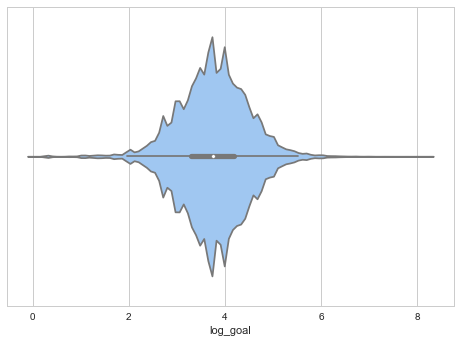

In [286]:
sns.violinplot(df['log_goal']);

* Taking the log of the goal (because there are still quite a few kickstarters with very high and very low goals), we find that the log of the goal appears to be very close to normally distributed.  It's possible that if we only focus on Kickstarts with goals between 50 USD and 100,000 USD, and ignore fringe kickstarters, we may be able to get a better understanding of how most kickstarters work

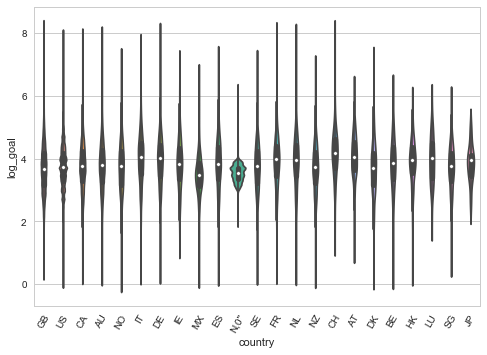

In [287]:
plt.xticks(rotation=60)
vplot= sns.violinplot(x="country", y="log_goal", data=df, figsize=(18, 6))

### Visualize Attributes	(15)	
> * Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

In [288]:
df.columns

Index(['id', 'name', 'category', 'main_category', 'currency', 'deadline',
       'launched', 'state', 'backers', 'country', 'usd_pledged_real',
       'usd_goal_real', 'log_goal'],
      dtype='object')

In [289]:
df['duration'] = (df['deadline'].apply(pd.Timestamp)\
    - df['launched'].apply(pd.Timestamp)).apply(lambda x: x.days)
df['launched_month'] = df['launched'].apply(lambda x: pd.Timestamp(x).month)

/Users/travis/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [290]:
dfcopy = df.assign(success=0)
dfcopy.loc[ dfcopy['state']=="successful", 'success' ] = 1
dfcopy.loc[:,'log_backers'] = np.log10(dfcopy.loc[:,'backers'] + 1)
dfcopy.loc[:,'log_usd_goal_real'] = \
    np.log10(dfcopy.loc[:,'usd_goal_real'] + 1)
dfcopy.loc[:,'log_usd_pledged_real'] = \
    np.log10(dfcopy.loc[:,'usd_pledged_real'] + 1)
dfcopy.loc[:,'log_duration'] = \
    np.log10(dfcopy.loc[:,'duration'] + 1)
    

dfcopy = dfcopy.assign(isUS=0)
dfcopy.loc[ dfcopy['country']=="US", 'isUS' ] = 1

### Explore Joint Attributes	(15)
> * Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

In [291]:
df_scatter = dfcopy.drop(['id', 'log_goal', 'isUS',  'usd_pledged_real',
                           'duration', 'usd_goal_real', 'backers'], axis=1)

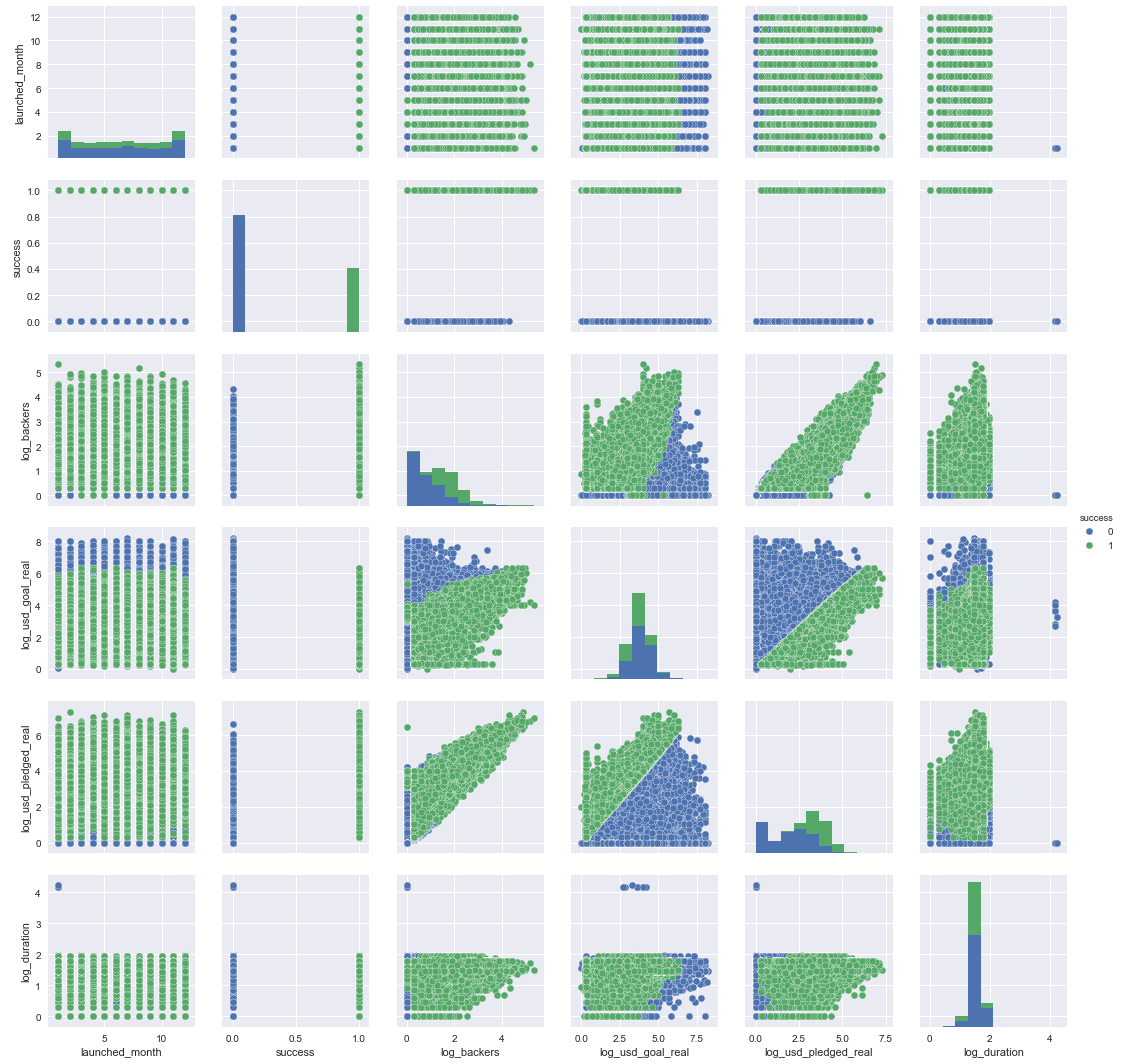

In [292]:
sns.set(style="darkgrid")
sns.pairplot(df_scatter, hue="success");

* From out generated features (kickstarter duration, and launched month, we see little correlation with success)

* What we do see from the scatterplot is that it looks as though there is a strongly diffirential relationship between number of backers and total goal price which serve as extremely strong predictiors of the success rate of a kickstarter

In [293]:
one_hot_df = pd.get_dummies(dfcopy, prefix_sep='$', 
               columns=['main_category', 'country'])\
      .drop(['isUS','launched', 'deadline', 'backers',
             'usd_goal_real', 'usd_pledged_real'], axis=1)\
      .drop([x for x in dfcopy.columns if 'log' in x], axis=1)

In [294]:
# one_hot_df.columns

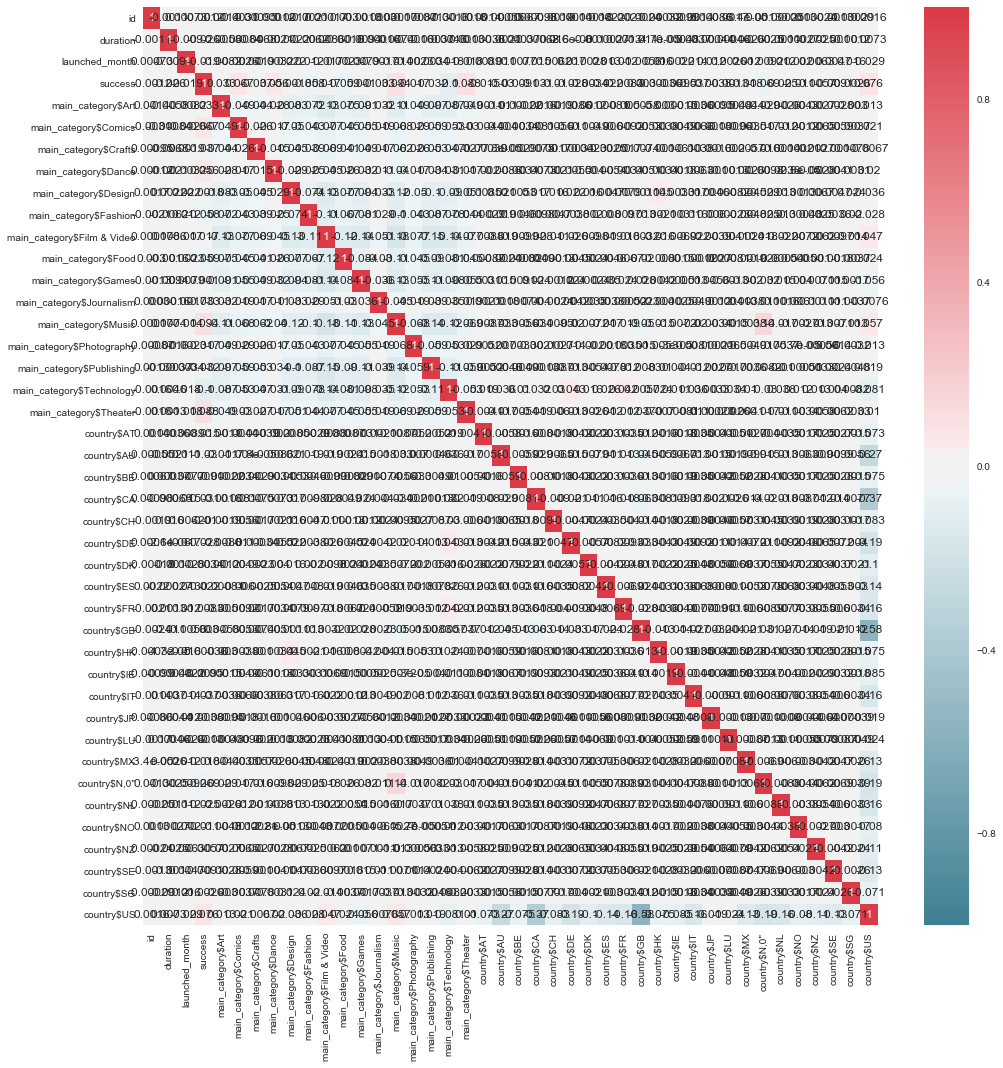

In [295]:
f, ax = plt.subplots(figsize=(15, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(one_hot_df.corr(), cmap=cmap, annot=True)

f.tight_layout()

* Overall the catagories of Theater, Music, Design and Comics are highly coorelated with a successful kickstarter

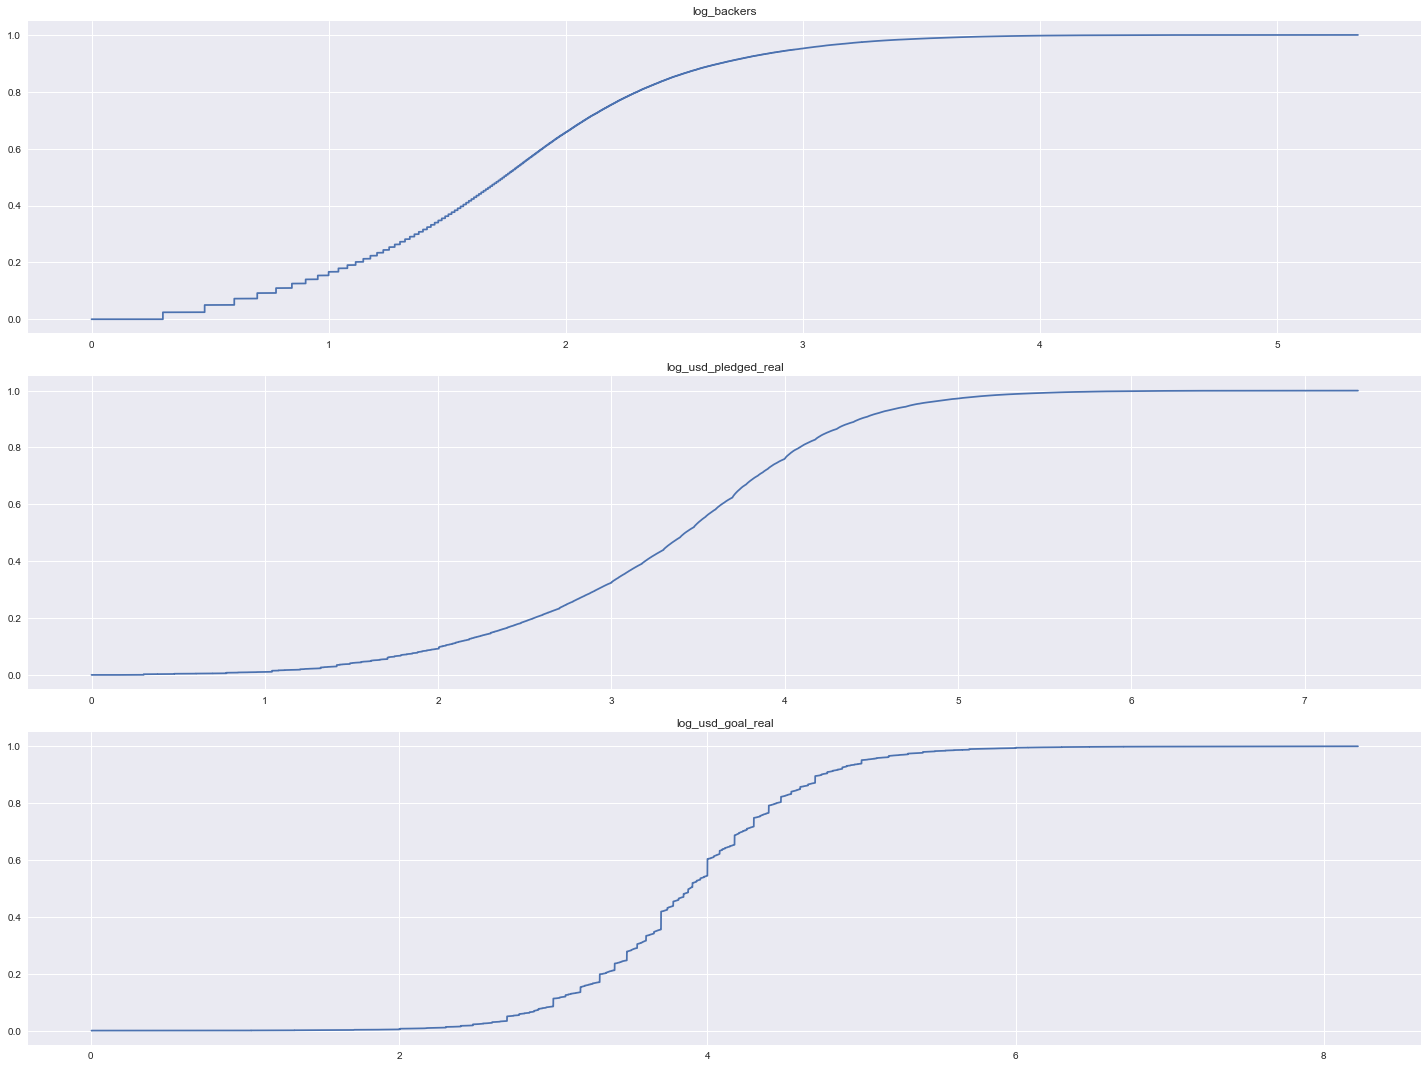

In [296]:
plt.figure(figsize=(20,15))
for fi,feature in enumerate(
        ['log_backers','log_usd_pledged_real','log_usd_goal_real']):
    plt.subplot(3,1,fi+1)
    x_ax = np.sort(dfcopy[feature])
    y_ax = np.cumsum(x_ax)
    y_ax = y_ax/np.max(y_ax)
    plt.plot(x_ax,y_ax)
    plt.title(feature)
    plt.tight_layout()
    
plt.show()

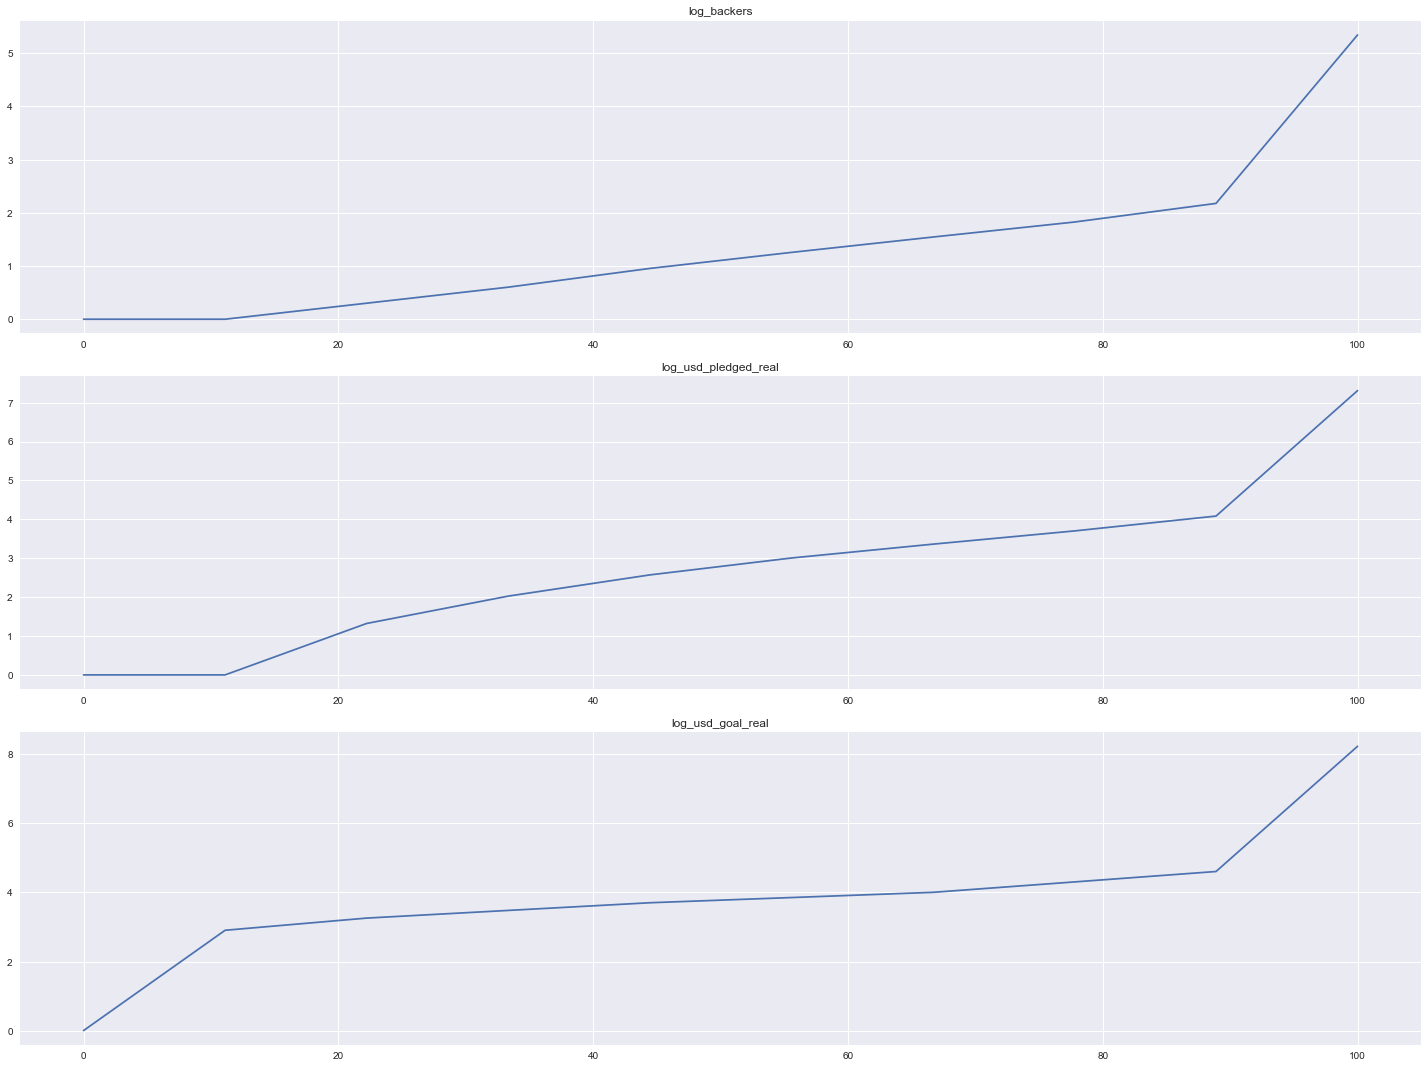

In [297]:
plt.figure(figsize=(20,15))
for fi,feature in enumerate(
    ['log_backers','log_usd_pledged_real','log_usd_goal_real']):
    plt.subplot(3,1,fi+1)
    x_ax = np.linspace(0,100,10)
    y_ax = [np.percentile(dfcopy[feature], x_val) for x_val in x_ax]
    plt.plot(x_ax,y_ax)
    plt.title(feature)
    plt.tight_layout()
    
plt.show()

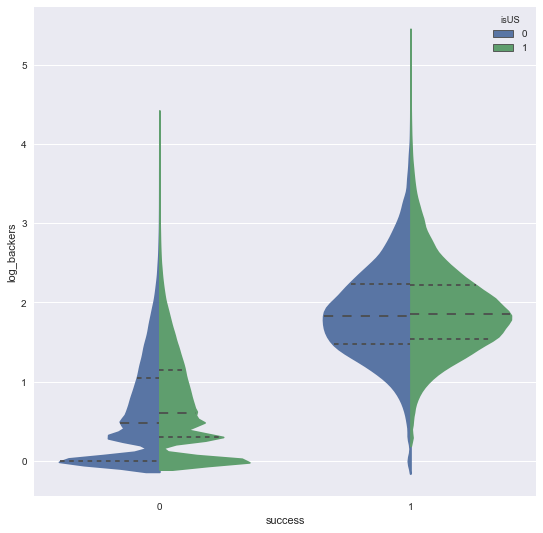

In [298]:
f, ax = plt.subplots(figsize=(9, 9))

sns.violinplot(x="success", y="log_backers", hue="isUS", data=dfcopy, 
               split=True, inner="quart")

### New Features	5	
>* Are there other features that could be added to the data or created from existing features? Which ones?

We allready extracted length, and start year from the given features.  It is possible that we could draw predictive values based on the kickstarter names as well given the lenght of names and parts of speach count for each name.

### Exceptional Work	10	
>* You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.

* below we have incorporated some additional plots to show additional relationships between the data.

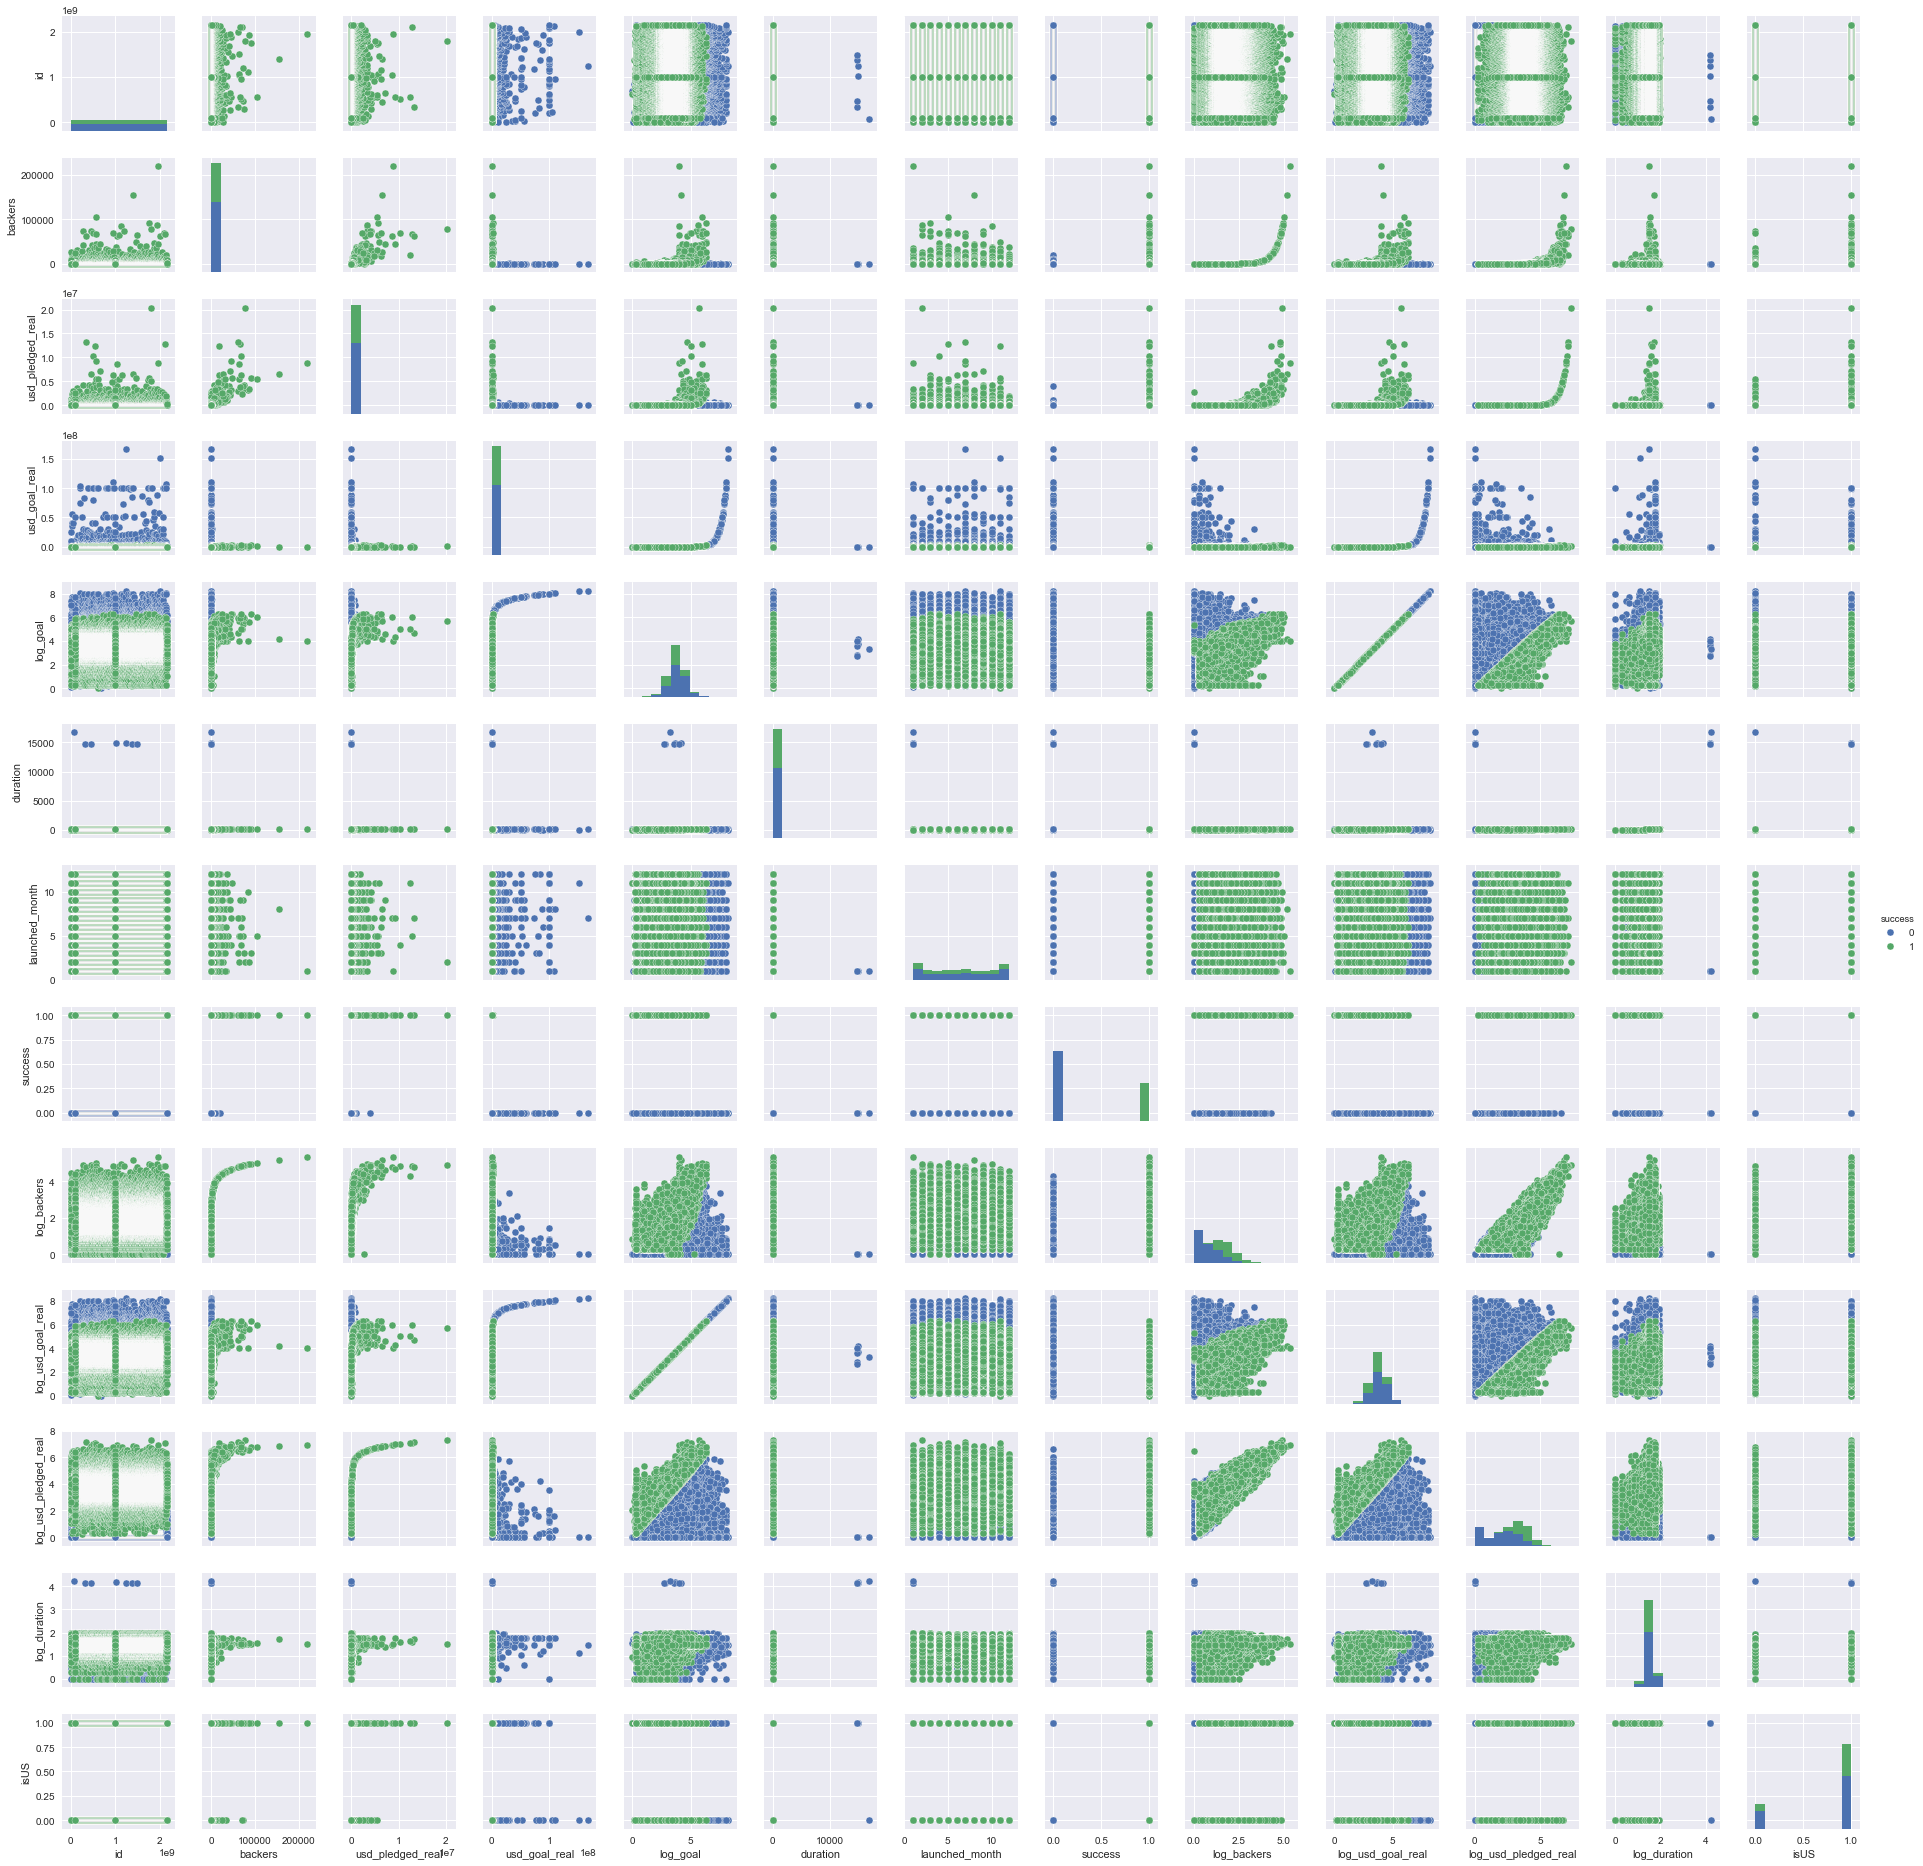

In [299]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

sns.pairplot(dfcopy, hue="success", size=2)

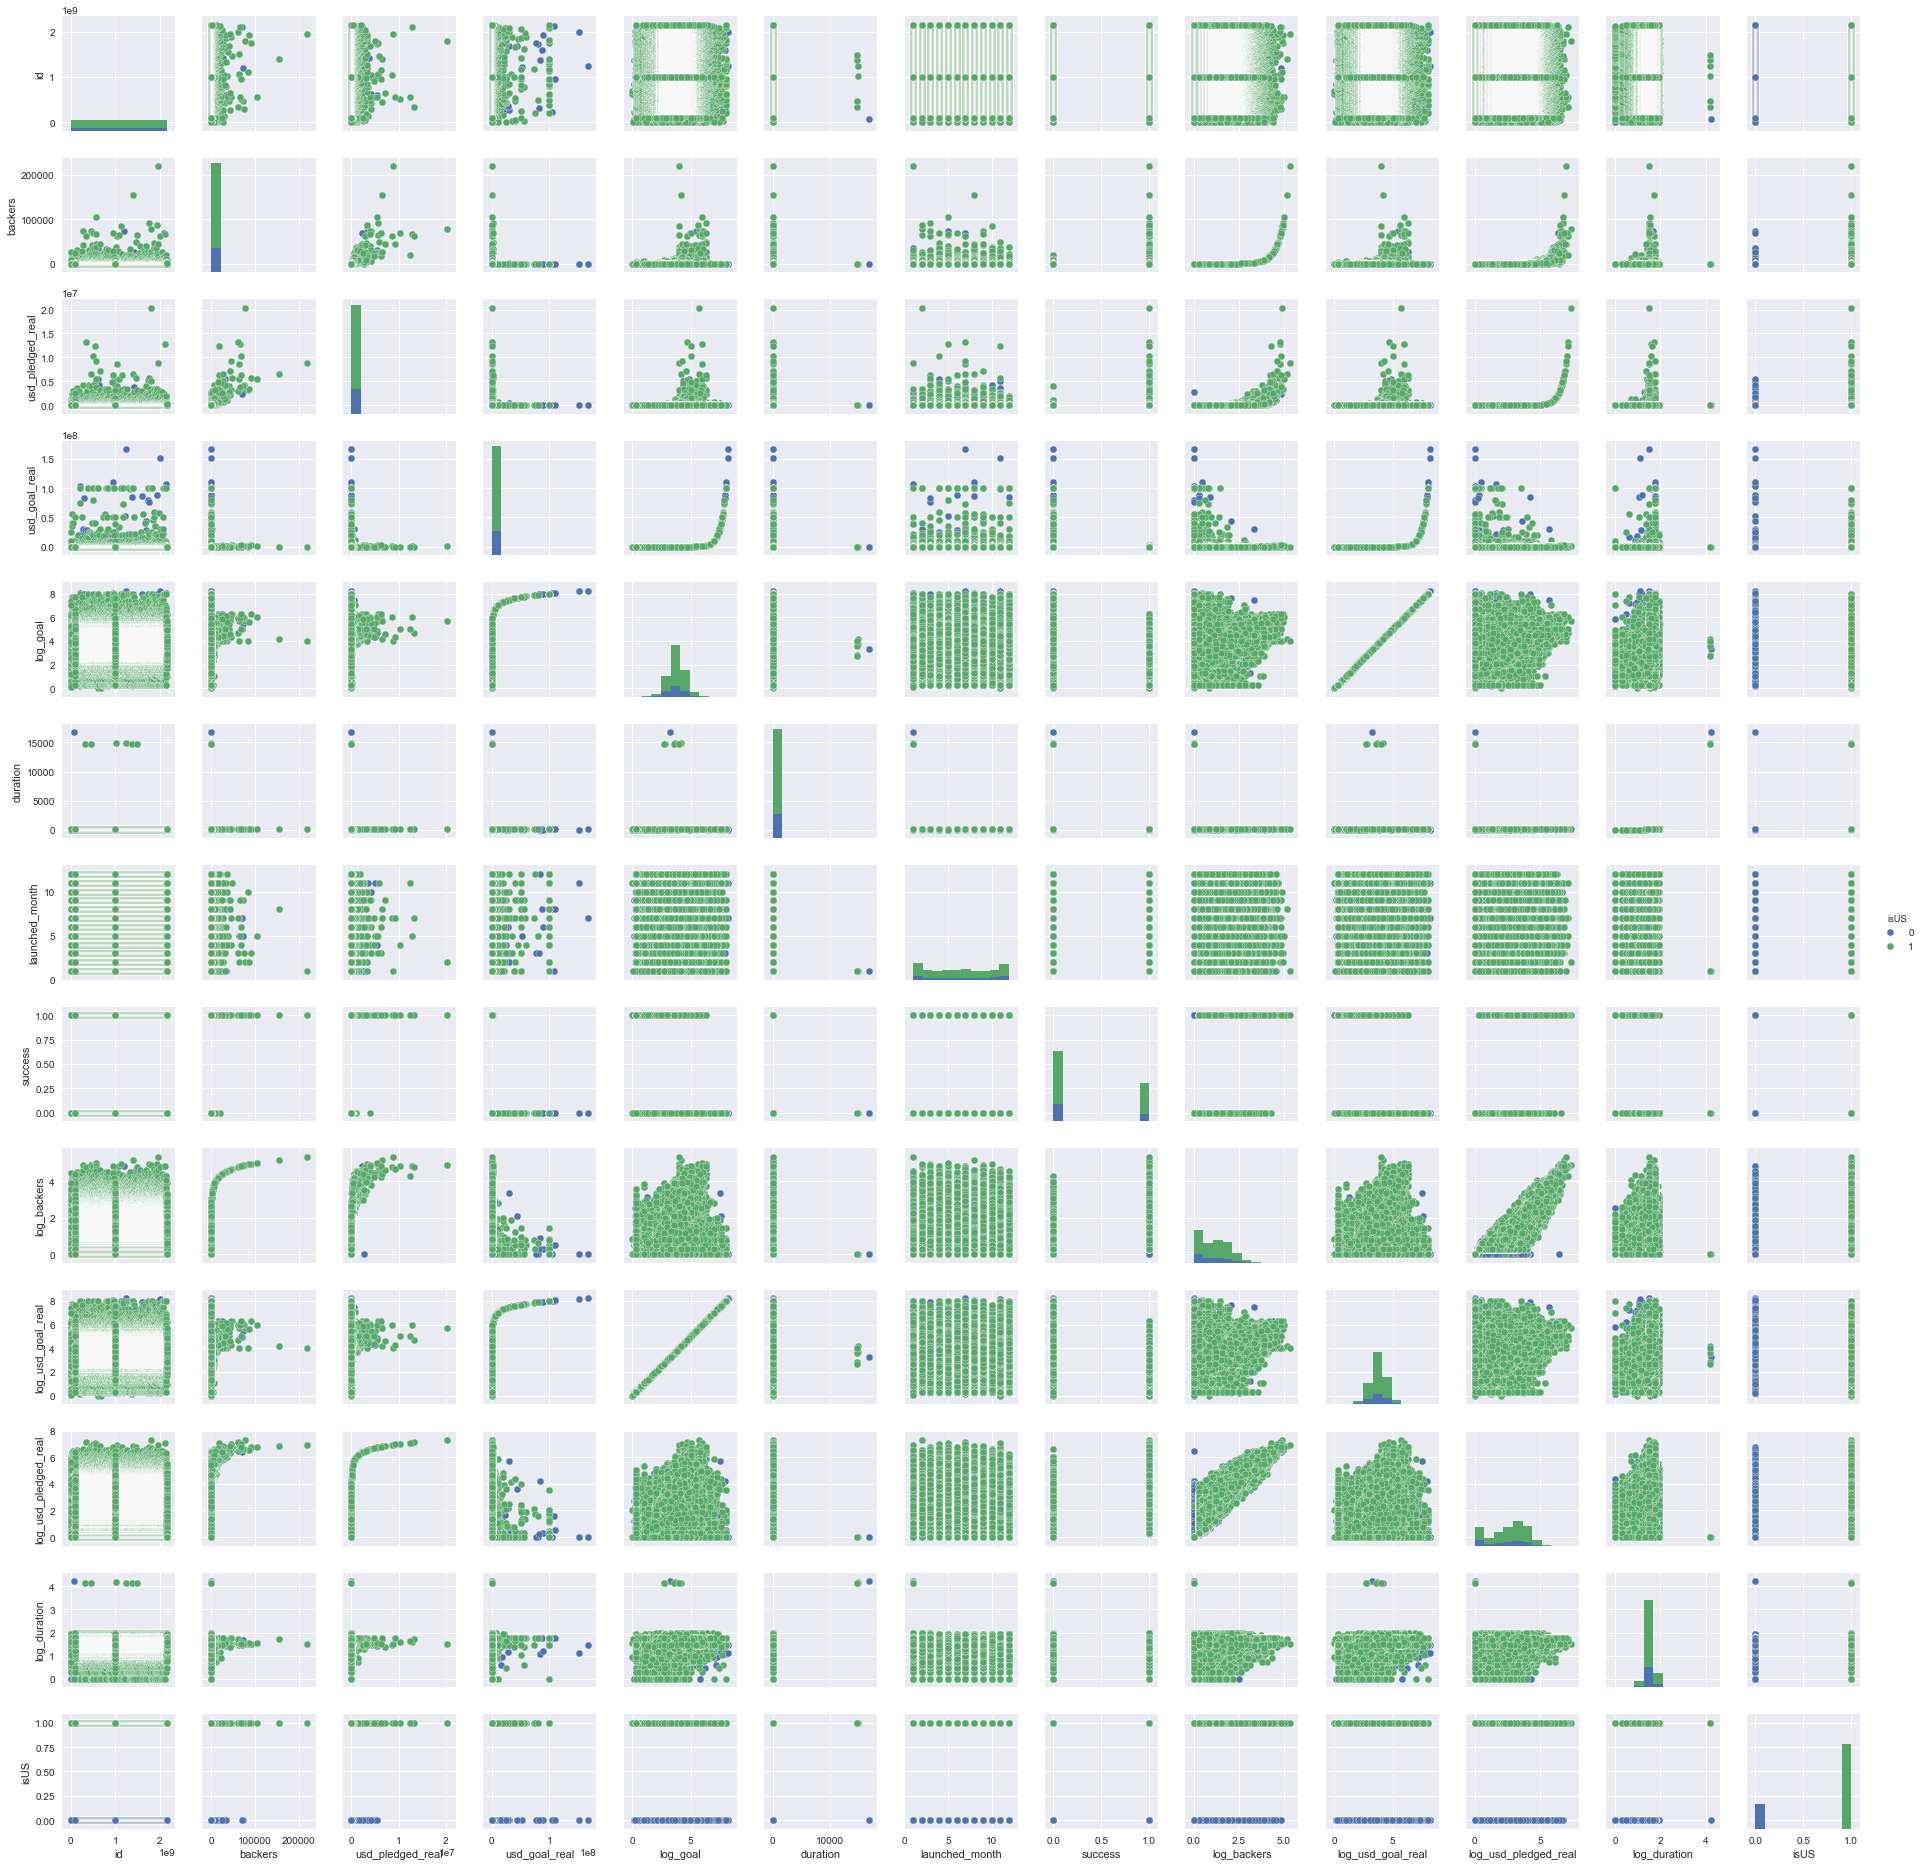

In [300]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

sns.pairplot(dfcopy, hue="isUS", size=2)

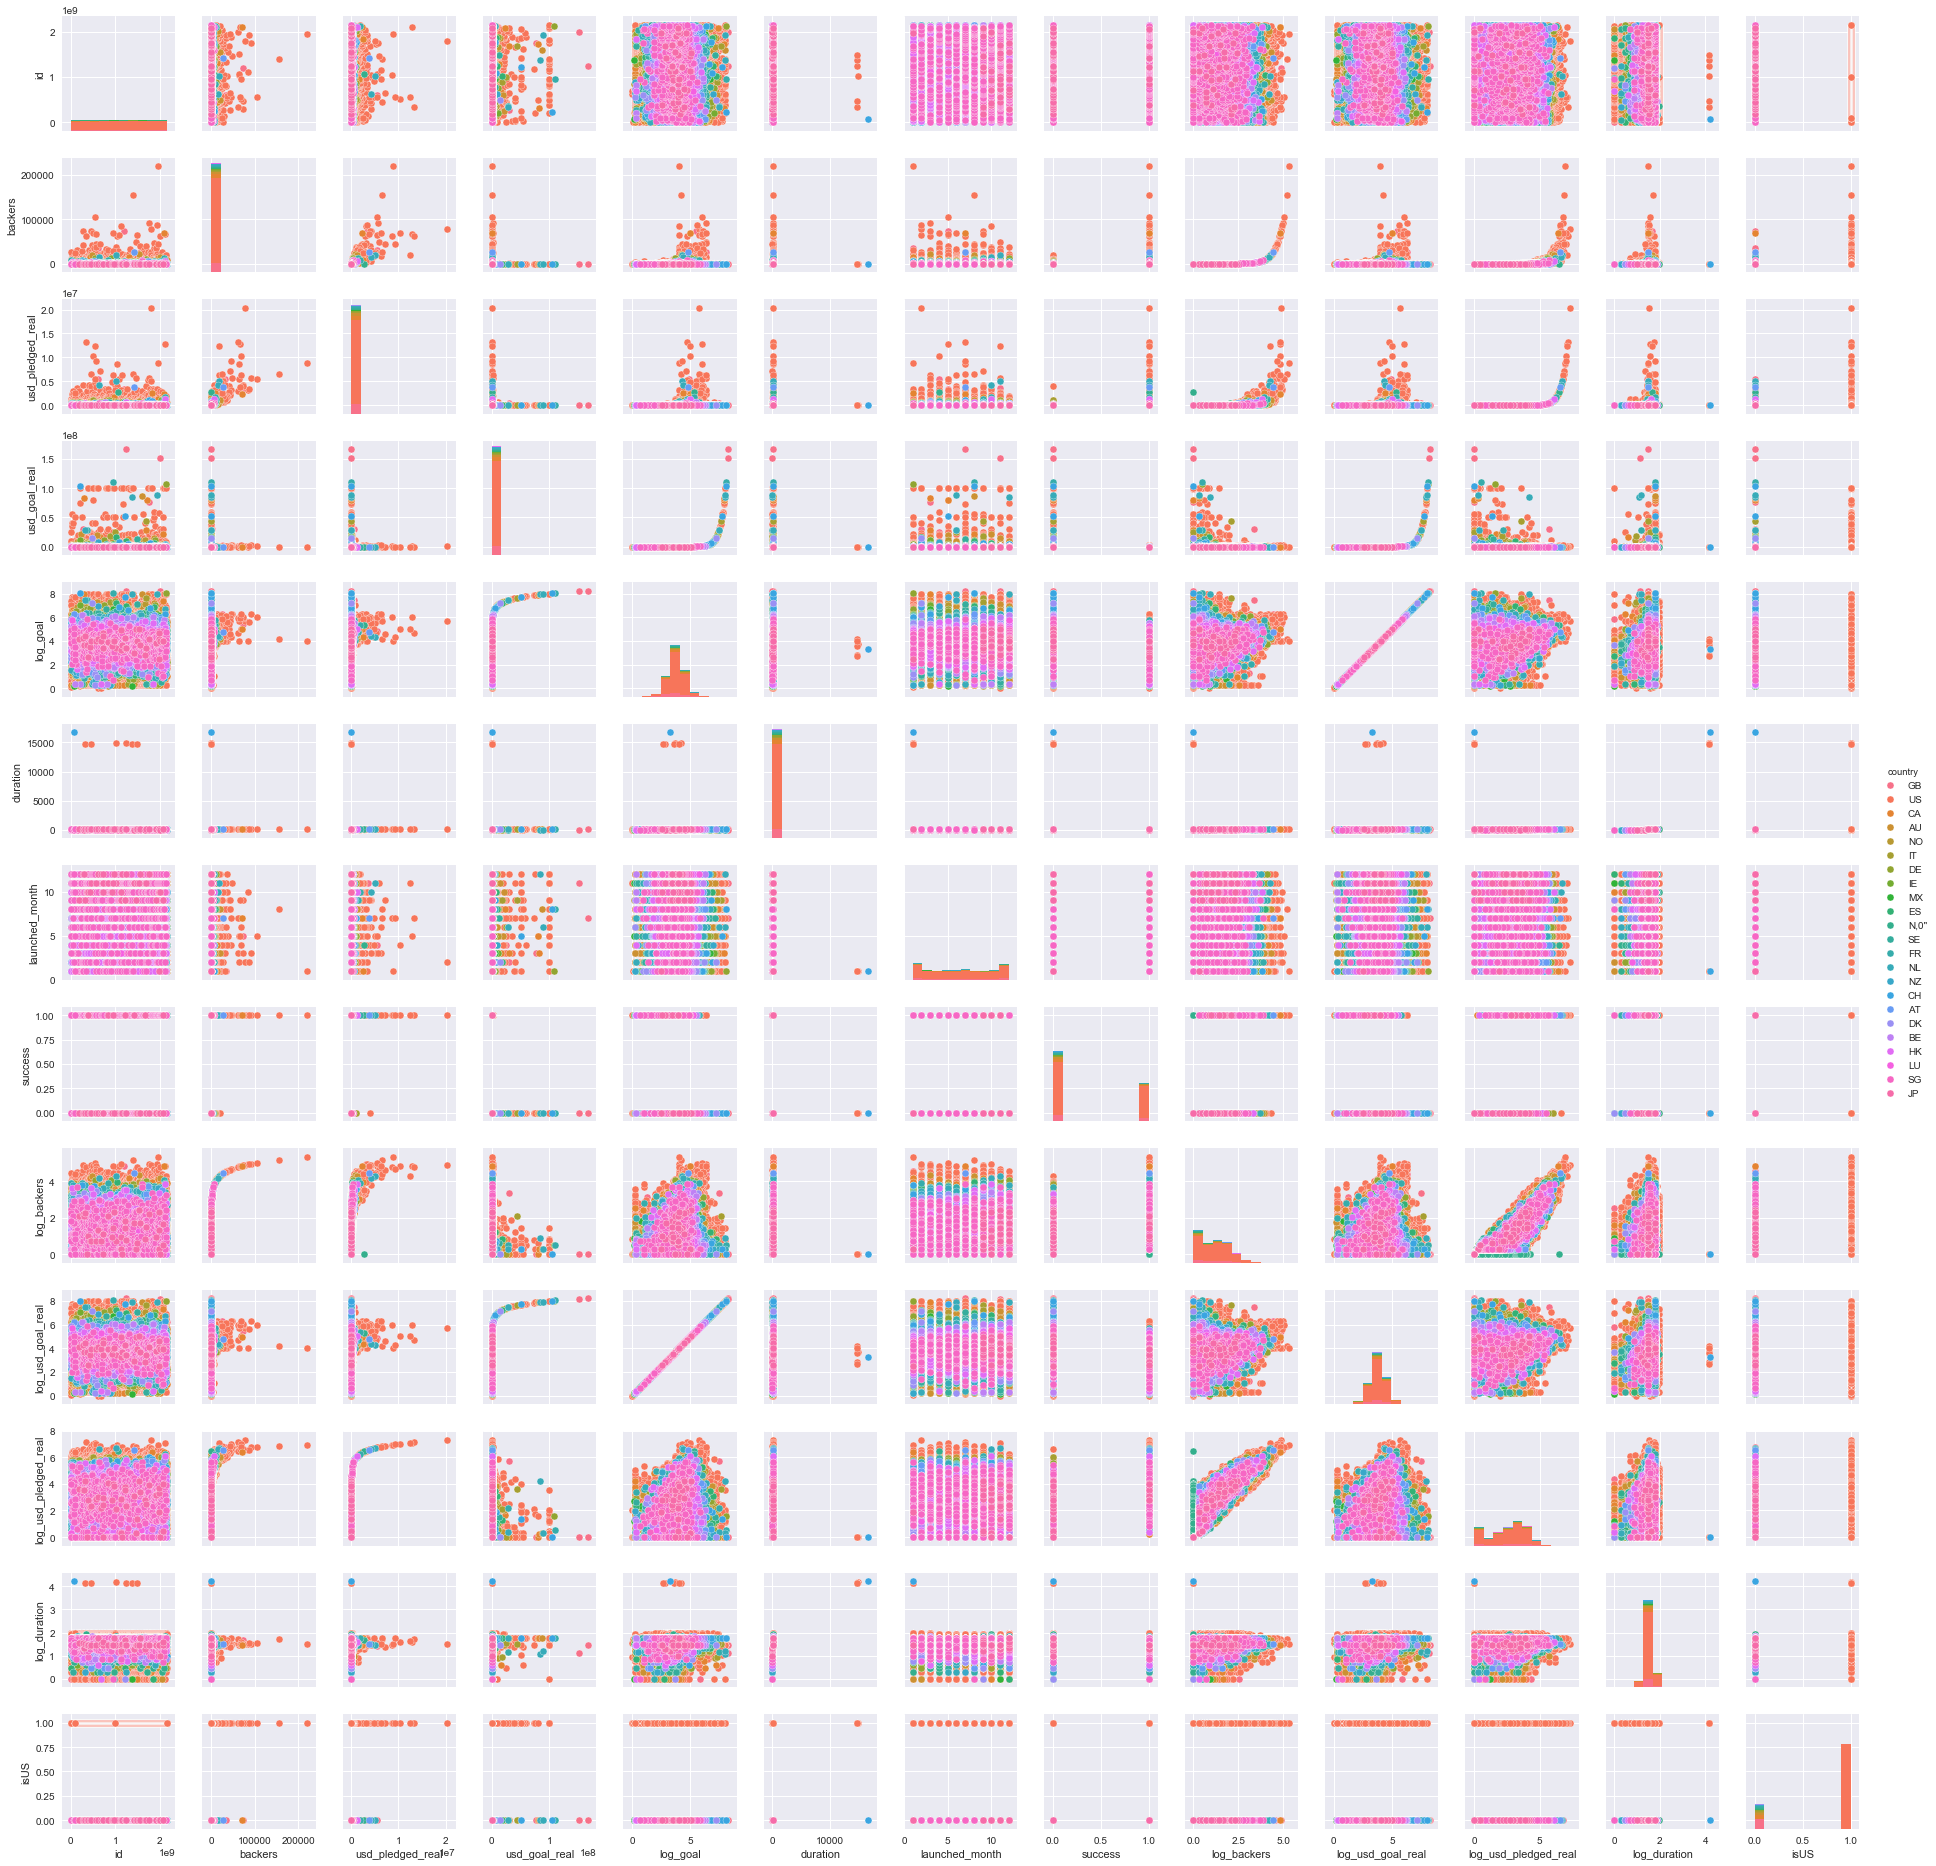

In [301]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

sns.pairplot(dfcopy, hue="country", size=2)

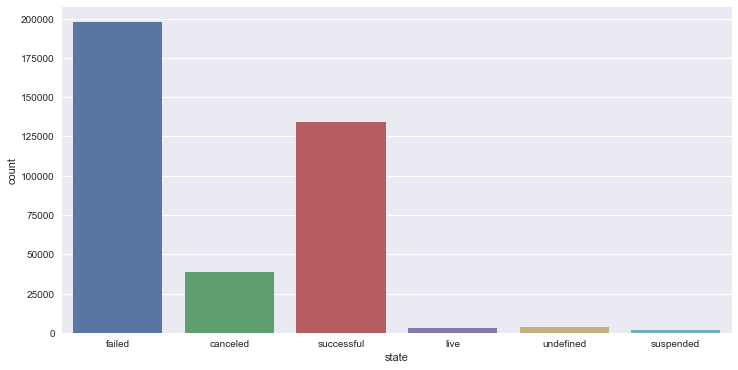

In [302]:
plt.figure(figsize=(12,6))
sns.countplot(x='state', data=data)

<function matplotlib.pyplot.tight_layout>

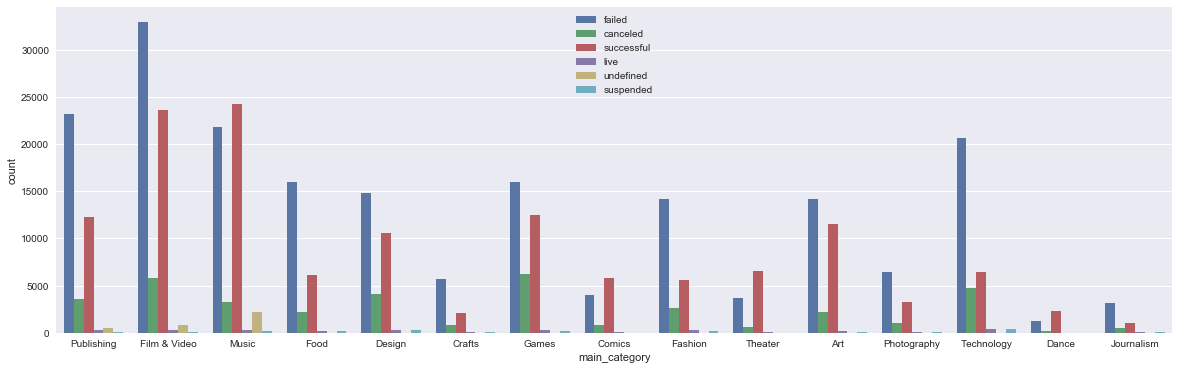

In [303]:
plt.figure(figsize=(20,6))
sns.countplot(x='main_category', data=data, hue='state')
plt.legend(loc='upper center')
plt.tight_layout

<function matplotlib.pyplot.tight_layout>

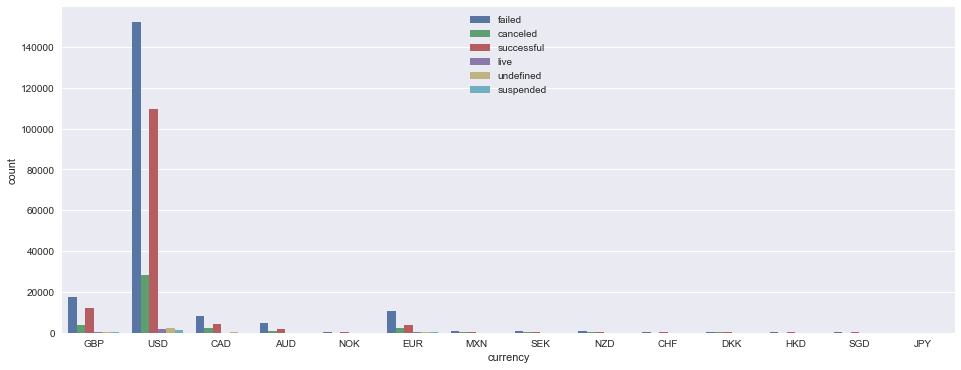

In [304]:
plt.figure(figsize=(16,6))
sns.countplot(x='currency', data=data, hue='state')
plt.legend(loc='upper center')
plt.tight_layout

In [305]:
data['deadline'].apply(pd.Timestamp).min()

Timestamp('2009-05-03 00:00:00')

In [306]:
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

### Conclusion

Using just the valus of number of backers and target price, you can make a very strong prediction of if the kickstarter will be successful or not; however, since you may not know how many backers are involved untill several months into the kickstarter project. It also stands you will be more likley to invest in a winning kickstarter if you invest in an artistic Kickstarter which is based in the US.